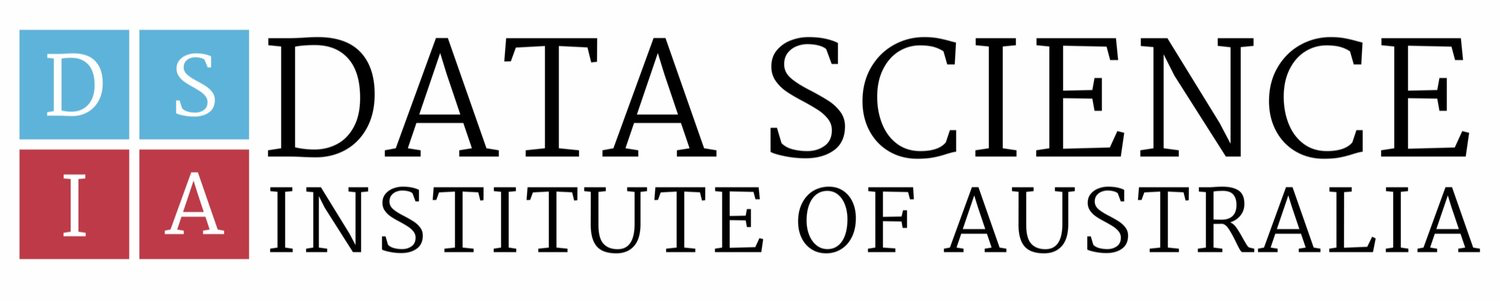

# Data Science and AI
## Lab 4.2: Feature Selection

### INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

### DESCRIPTION
Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ($R^2$ and $Adjusted \: R^2$ in this case).

### 1. Load & Explore Data

In [2]:
# Import Libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Read CSV
wine = pd.read_csv('winequality_merged.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [6]:
wine.shape

(6497, 13)

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
red_wine                6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [9]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


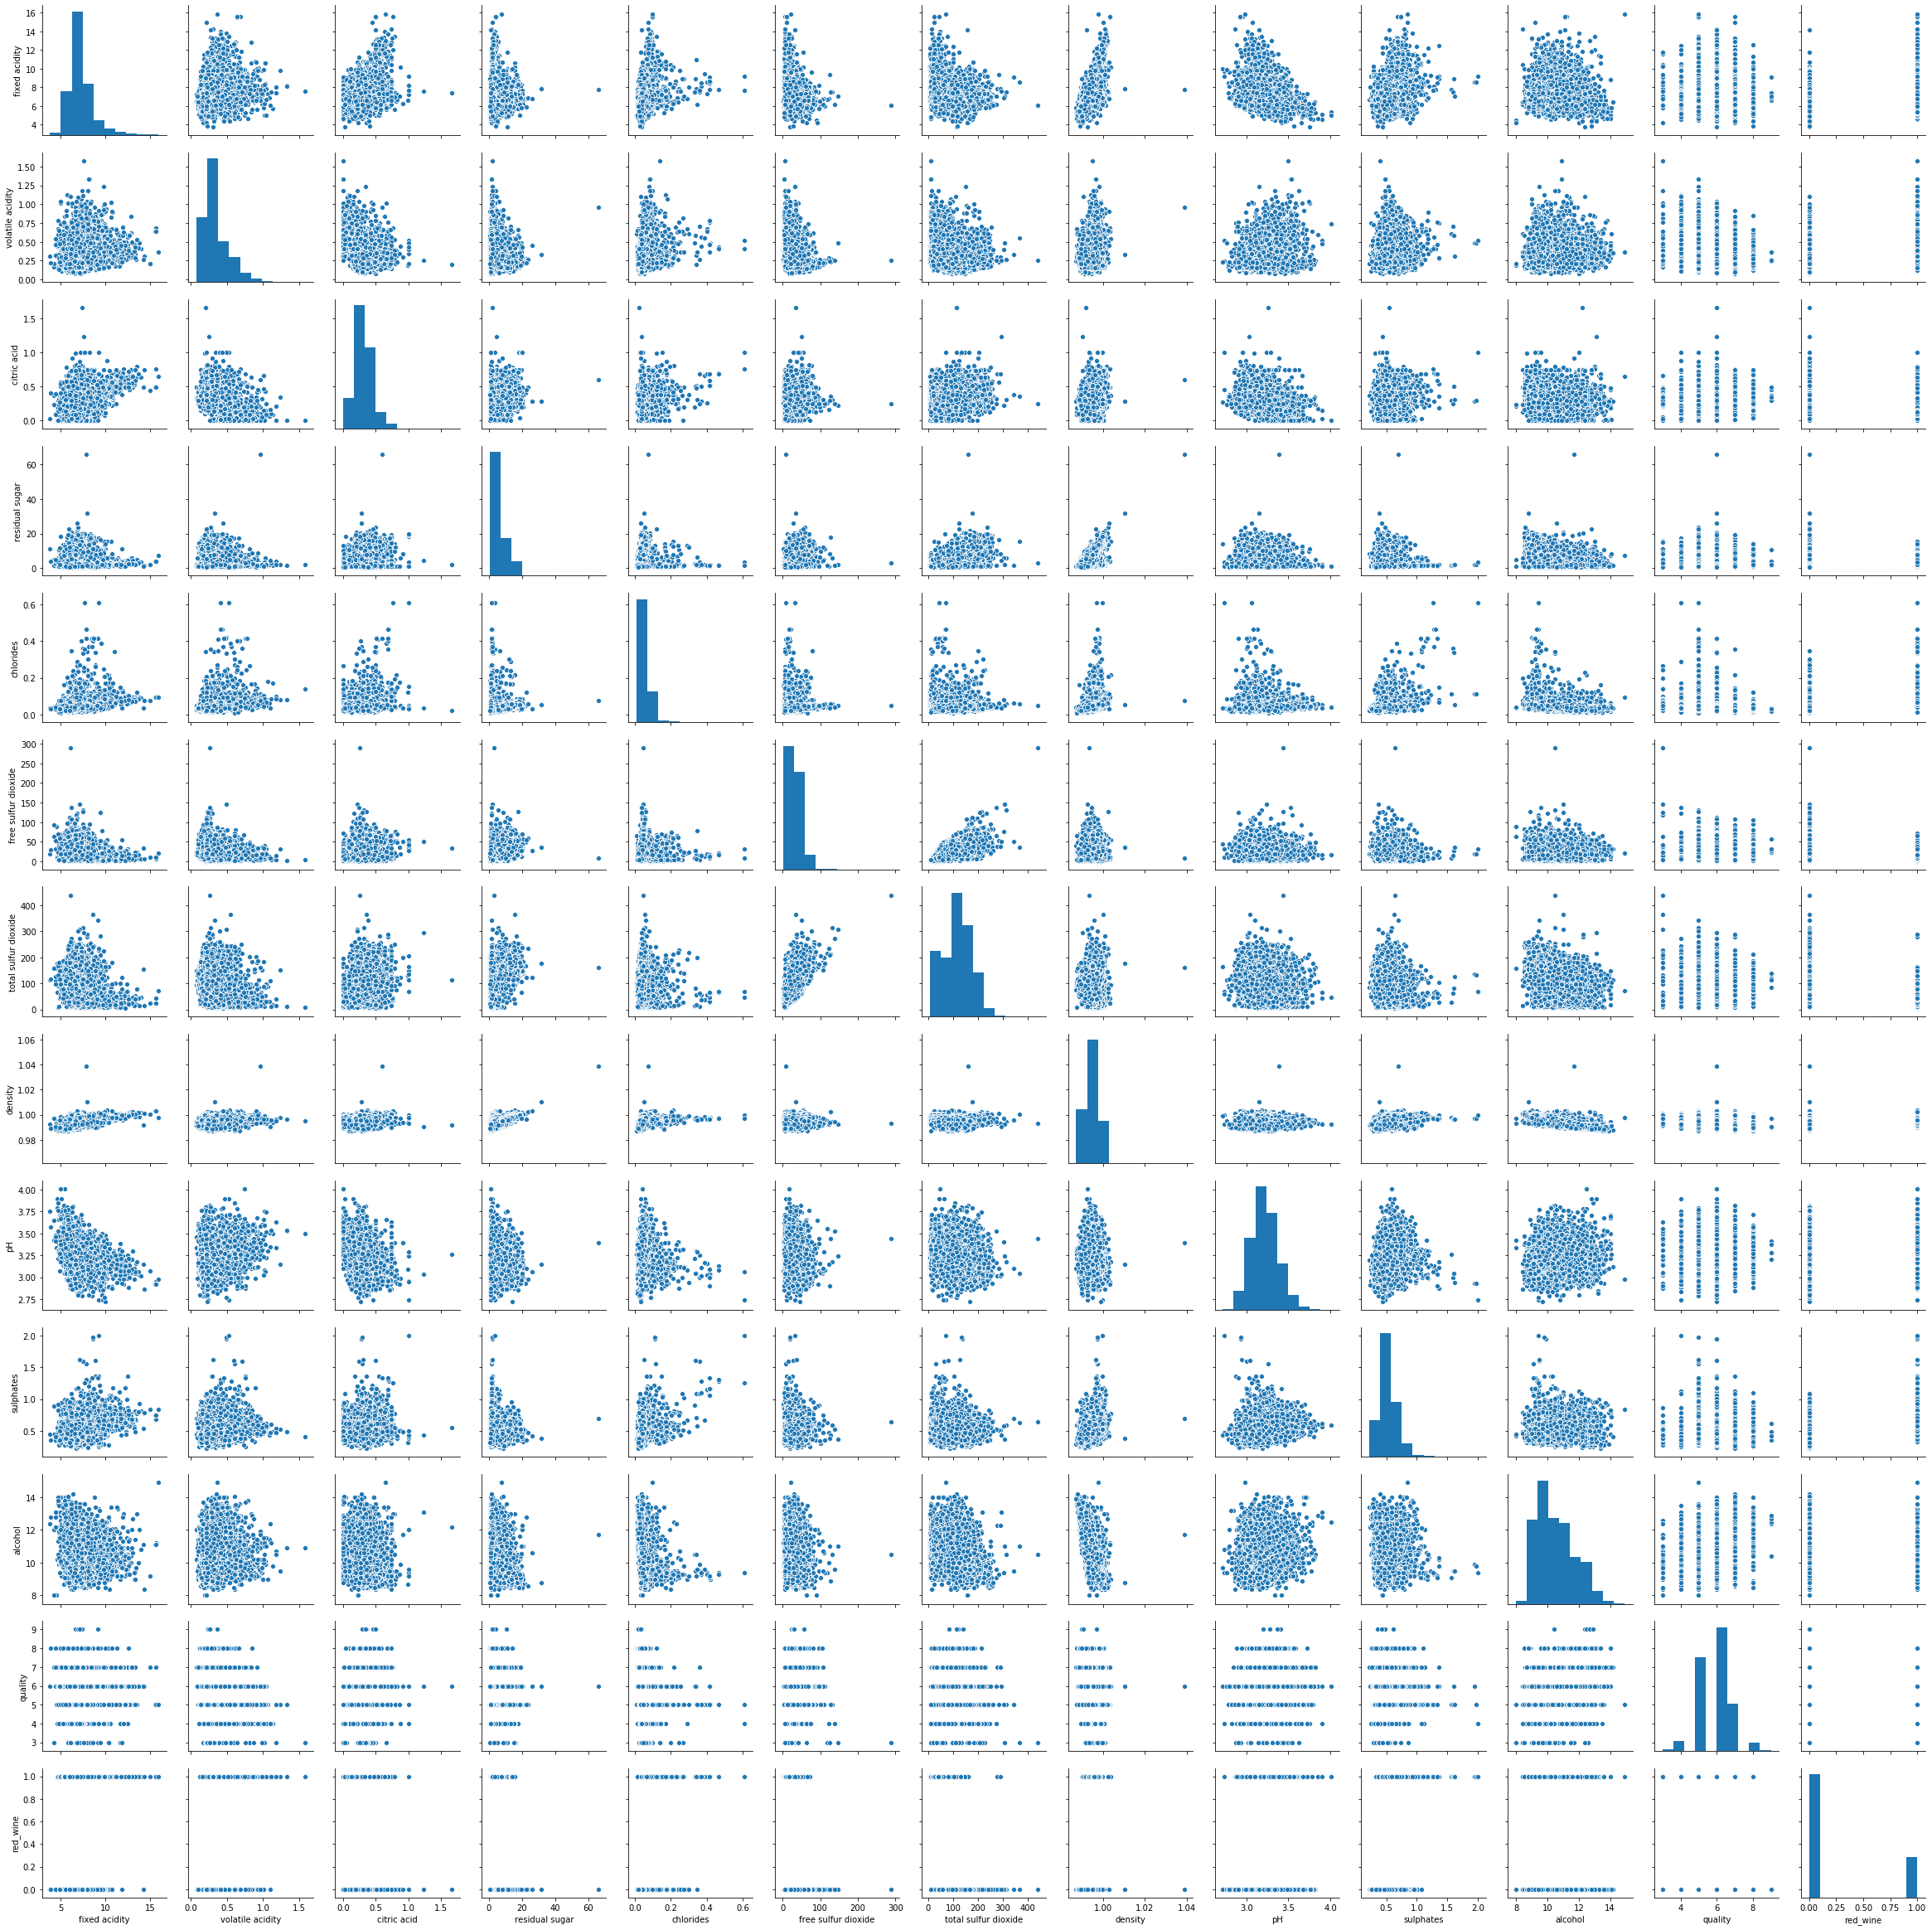

In [18]:
#Pairplot
sns.pairplot(wine)
plt.show()

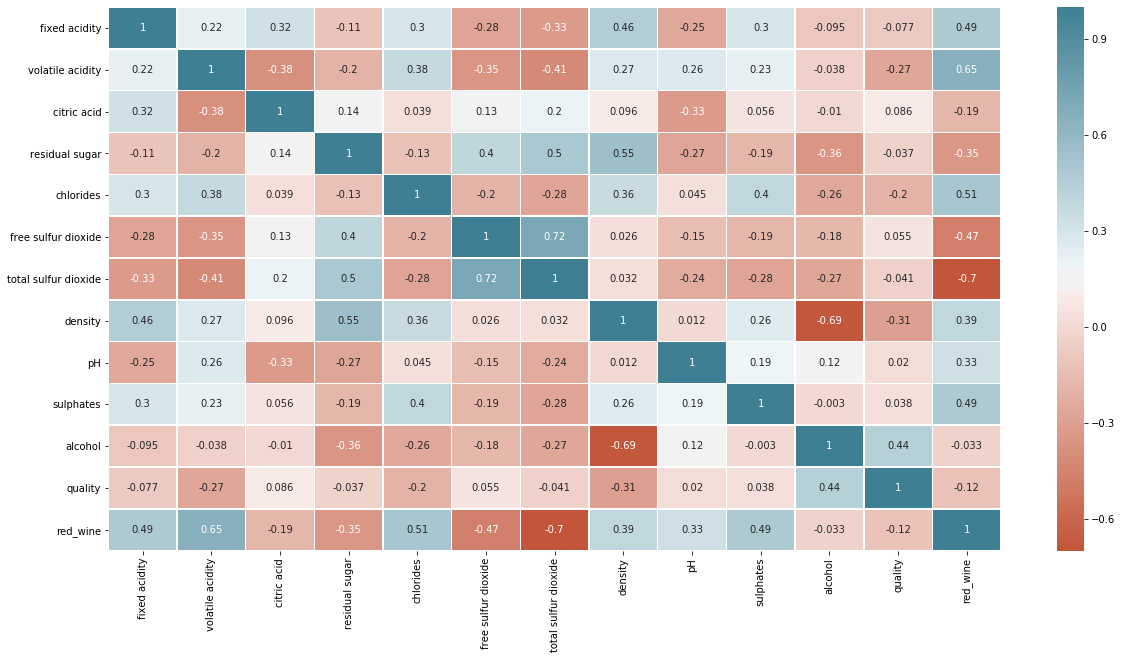

In [19]:
corr = wine.corr()
fig, ax = plt.subplots(figsize=(20,10))         
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap = sns.diverging_palette(20, 220, n=200),
            annot=True,
            linewidth=0.5,
            ax=ax)

### 2. Set Target Variable
Create a target variable for wine quality.

In [23]:
# insert code here
y = wine['quality']

### 3. Set Predictor Variables
Create a predictor matrix with variables of your choice.

In [24]:
# insert code here
wine.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [39]:
predictor_columns = ['fixed acidity', 'volatile acidity', 
                     'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                     'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

In [30]:
X = wine[predictor_columns]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


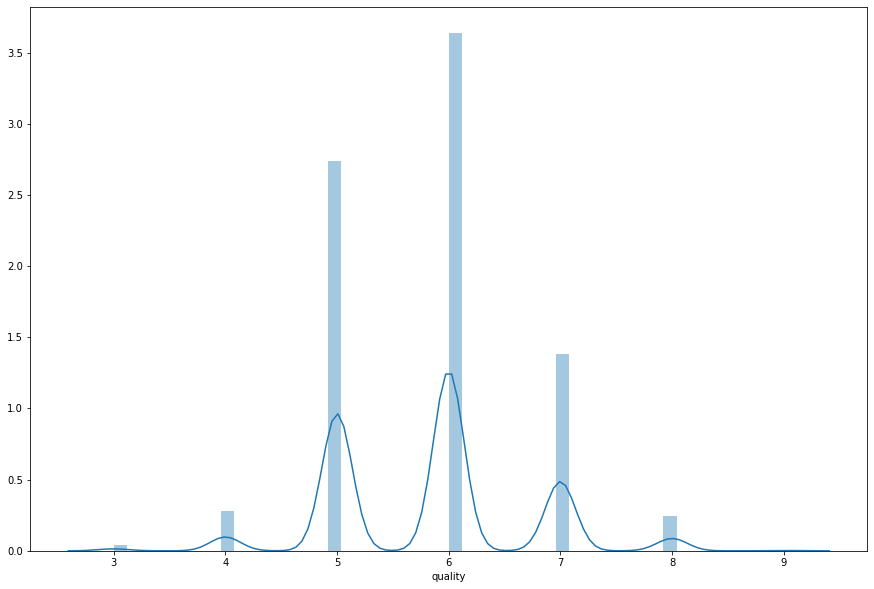

In [34]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(wine['quality'])

### 4. Using Linear Regression Create a Model and Test Score

In [47]:
# Train-Test Split
# insert code here - Training data was set at 80%, Test dat was set at 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
# Create a model for Linear Regression

# Fit the model with the Training data
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)


0.29925235604870537

In [37]:
# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test, y_test)

0.2597673129789977

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

### Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 5.1 Load Wine Data & Define Predictor and Target

In [43]:
# Load the dataset

# Load the wine dataset from csv
wine = pd.read_csv('winequality_merged.csv')

# define the target variable (dependent variable) as y
y = wine['quality']

# Take all columns except target as predictor columns
predictor_columns = [c for c in wine.columns if c != 'quality']
# Load the dataset as a pandas data frame
X = pd.DataFrame(wine, columns = predictor_columns)

In [44]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### 5.2 Overview of the code below

The external `while` loop goes forever until there are no improvements to the model, which is controlled by the flag `changed` (until is **not** changed).
The inner `for` loop goes over each of the features not yet included in the model and calculates the correlation coefficient. If any model improves on the previous best model then the records are updated.

#### Code variables
- `included`: list of the features (predictors) that were included in the model; starts empty.
- `excluded`: list of features that have **not** been included in the model; starts as the full list of features.
- `best`: dictionary to keep record of the best model found at any stage; starts 'empty'.
- `model`: object of class LinearRegression, with default values for all parameters.

#### Methods of the `LinearRegression` object to investigate
- `fit()`
- `fit.score()`

#### Adjusted $R^2$ formula
$$Adjusted \; R^2 = 1 - { (1 - R^2) (n - 1)  \over n - k - 1 }$$

#### Linear Regression [reference](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [45]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [46]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = citric acid, red_wine, residual sugar, total sulfur dioxide, pH, free sulfur dioxide, alcohol, density, chlorides, fixed acidity, sulphates, volatile acidity
(Step) Trying citric acid...
(Step) - Features = citric acid
(Step) - Adjusted R^2: This = 0.006; Best = 0.000
(Step) - New Best!   : Feature = citric acid; R^2 = 0.007; Adjusted R^2 = 0.006
(Step) Trying red_wine...
(Step) - Features = red_wine
(Step) - Adjusted R^2: This = 0.013; Best = 0.006
(Step) - New Best!   : Feature = red_wine; R^2 = 0.014; Adjusted R^2 = 0.013
(Step) Trying residual sugar...
(Step) - Features = residual sugar
(Step) - Adjusted R^2: This = 0.001; Best = 0.013
(Step) Trying total sulfur dioxide...
(Step) - Features = total sulfur dioxide
(Step) - Adjusted R^2: This = 0.001; Best = 0.013
(Step) Trying pH...
(Step) - Features = pH
(Step) - Adjusted R^2: This = -0.000; Best = 0.013
(Step) Trying free sulfur dioxide...
(Step) - Features = free sulfur dioxide
(Step) - Adjusted R^2: This = 0.0